In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from ipcv import cvlib, scanner
from importlib import reload
from scipy import stats as st

reload(cvlib)
reload(scanner)


# A function to display side-by-side visuals for comparisons.
def display(source_img, cropped_img):
    # Display the previous and current side-by-side for visual comparison.
    plt.figure(figsize=(14, 12))
    plt.subplot(1, 2, 1)
    plt.imshow(source_img, cmap='gray')
    plt.title('Source Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cropped_img, cmap='gray')
    plt.title('Cropped Image')

[1] --Contour       : found=353; min-req-area=17,496.00 (0.02 at rate); area should be > 2.00%
[c:25] --Contour(box) : selected max-area=19,297.50 at rate=2.21%
Decoded barcode : https://go.mands.co/yzk


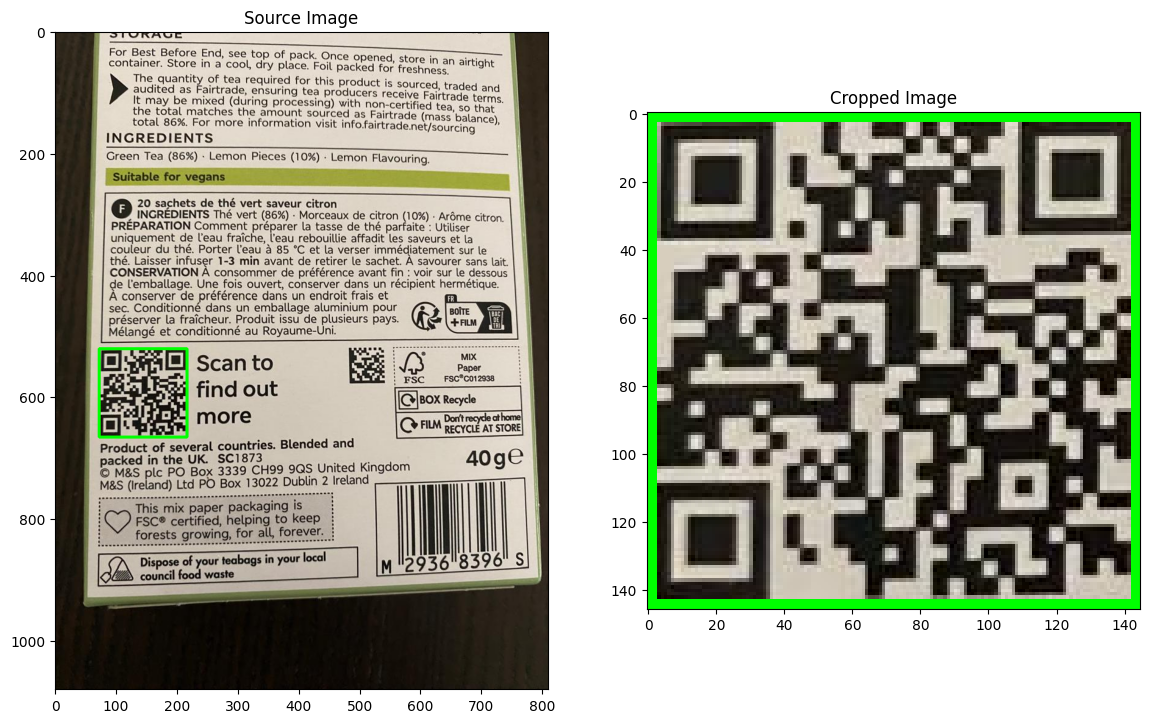

In [4]:
image = cvlib.load_image('resources/qr-code/qrcode200.jpeg')

gamma = 0.1
gaussian_ksize = (3, 3)
gaussian_sigma = 2
# pre = scanner.preprocess_image(image, gamma, gaussian_ksize, gaussian_sigma)

box = scanner.detect_qrcode(image,
                            gamma=gamma,
                            gaussian_ksize=gaussian_ksize,
                            gaussian_sigma=gaussian_sigma,
                            thresh_min=128,
                            box=True,
                            min_area_factor=0.02)
if box is not None:
    cropped = scanner.crop_roi2(image, box)
    scanner.draw_bounding_box2(image, box, scanner.GREEN)
    display(image, cropped)
    print(f'Decoded barcode : {scanner.decode_qrcode(cropped, box)}')
else:
    print('Box is null!')